In [31]:
import torch
import fastai
import torchvision
import pandas as pd
import numpy as np
import imutils
import cv2
import matplotlib.pyplot  as plt
import matplotlib.image as mpimg
from torch import nn
from torch.nn import functional as F

In [32]:
%matplotlib inline

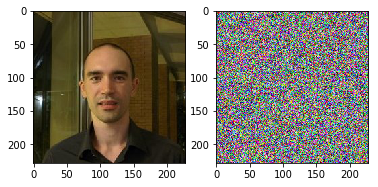

In [55]:
img_path = fastai.Path("/Users/alvaro/Downloads/AAEAAQAAAAAAAAd5AAAAJDBiN2RjODUyLTg5YzMtNGI1My1iYmY1LWJhZjQ3ZDRjMDMwZg.jpg")
image = mpimg.imread(img_path)/255

import scipy.ndimage
white_image = torch.rand(*image.shape, requires_grad=True)
# white_image = scipy.ndimage.filters.median_filter(white_image.detach().numpy(), [8,8,1])
white_image.requires_grad=True

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(white_image.detach().cpu().numpy())

In [56]:
image_t = torch.Tensor(image)
F.mse_loss(image_t, white_image)

tensor(29200.1992, grad_fn=<SumBackward0>)

loss 24074.541015625


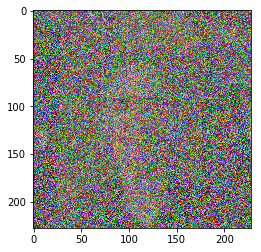

In [58]:
criterion = torch.optim.Adam([white_image], lr=0.05)

criterion.zero_grad()
loss = F.mse_loss(image_t, white_image)
print("loss", loss.data.item())
loss.backward()
criterion.step()

plt.imshow(white_image.detach().numpy())